# Fruit Classification 

This project uses a [Kaggle dataset](https://www.kaggle.com/datasets/moltean/fruits) with fruit images in order to create a model that is able to recognise them. 

This dataset includes photos of many different fruits and a bunch of different varieties of each. Therefore, we were forced to reduce the amount of samples, choosing to keep three pairs of similar fruits - Apples and Tomatoes, Kiwis and Cocos and Lemons and Oranges - and all the different varieties of each. 

Given the complexity of the task, we do not have objective features to work with, we will focus on unsupervised learning techniques, including deep learning.

More than comparing results of different learning algorithms, our goal will also be to test different manipulations on the dataset - ignoring fruit varieties or not, undersampling and oversampling, and others that we may find insightful.

## Dataset Description

In [1]:
import os
import random
import matplotlib.pyplot as plt

In [2]:
BASE_DATASET_PATH = './dataset'
TRAIN_DATASET_PATH = BASE_DATASET_PATH + '/Training'
TEST_DATASET_PATH = BASE_DATASET_PATH + '/Test'

In [3]:
def load_images(path: str, category_transformation) -> dict:
    images = {}
    
    for folder in os.listdir(path):
        category = folder.split()[0]
        folder = path + '/' + folder
        if category not in images.keys(): images[category] = []
        images[category].append([folder + '/' + file for file in os.listdir(folder)])
        
    return images

def load_dataset_images(category_transformation = lambda category: category):
    train = load_images(TRAIN_DATASET_PATH, category_transformation)
    test = load_images(TEST_DATASET_PATH, category_transformation)
    return list(train.keys()), train, test

Train Dataset
{'Apple': 6404, 'Cocos': 490, 'Kiwi': 466, 'Lemon': 982, 'Orange': 479, 'Tomato': 5103}

Test Dataset
{'Apple': 2134, 'Cocos': 166, 'Kiwi': 156, 'Lemon': 330, 'Orange': 160, 'Tomato': 1707}


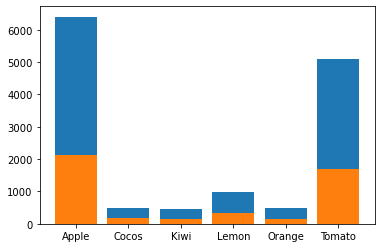

In [4]:
categories, train_images, test_images = load_dataset_images()

# Debugging information

plt.bar(categories, [ sum([len(ims) for ims in images]) for category, images in train_images.items() ])
plt.bar(categories, [ sum([len(ims) for ims in images]) for category, images in test_images.items() ])
print('Train Dataset')
print({ category: sum([len(ims) for ims in images]) for category, images in train_images.items() })

print()

print('Test Dataset')
print({ category: sum([len(ims) for ims in images]) for category, images in test_images.items() })

## Balance Dataset

In [5]:
# Balance training dataset
max_number_collections = max([ len(collections) for collections in train_images.values() ])
min_number_samples = min([ sum([len(collection) for collection in collections]) for collections in train_images.values() ])
train_images_balanced = { category: [ image for collection in collections for image in random.sample(collection, int(min_number_samples/len(collections))) ] for category, collections in train_images.items() }
train_images_balanced = { category: images + random.sample([image for collection in train_images[category] for image in collection if image not in train_images_balanced[category]], min_number_samples - len(train_images_balanced[category])) for category, images in train_images_balanced.items() }

# Debugging information
print('Train Dataset')
print({ category: len(set(images)) for category, images in train_images_balanced.items() })

Train Dataset
{'Apple': 466, 'Cocos': 466, 'Kiwi': 466, 'Lemon': 466, 'Orange': 466, 'Tomato': 466}


In [6]:
# Format datasets
train_dataset = train_images_balanced
test_dataset = { category: [ image for collection in collections for image in collection ] for category, collections in test_images.items() }

# Debugging information
print('Train Dataset')
print({ category: len(images) for category, images in train_dataset.items() })

print()

print('Test Dataset')
print({ category: len(images) for category, images in test_dataset.items() })

Train Dataset
{'Apple': 466, 'Cocos': 466, 'Kiwi': 466, 'Lemon': 466, 'Orange': 466, 'Tomato': 466}

Test Dataset
{'Apple': 2134, 'Cocos': 166, 'Kiwi': 156, 'Lemon': 330, 'Orange': 160, 'Tomato': 1707}


In [7]:
import matplotlib.image as mpimg

In [8]:
def load_image_files(data):
    return { category: [ mpimg.imread(image) for image in images ] for category, images in data.items() }

(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)


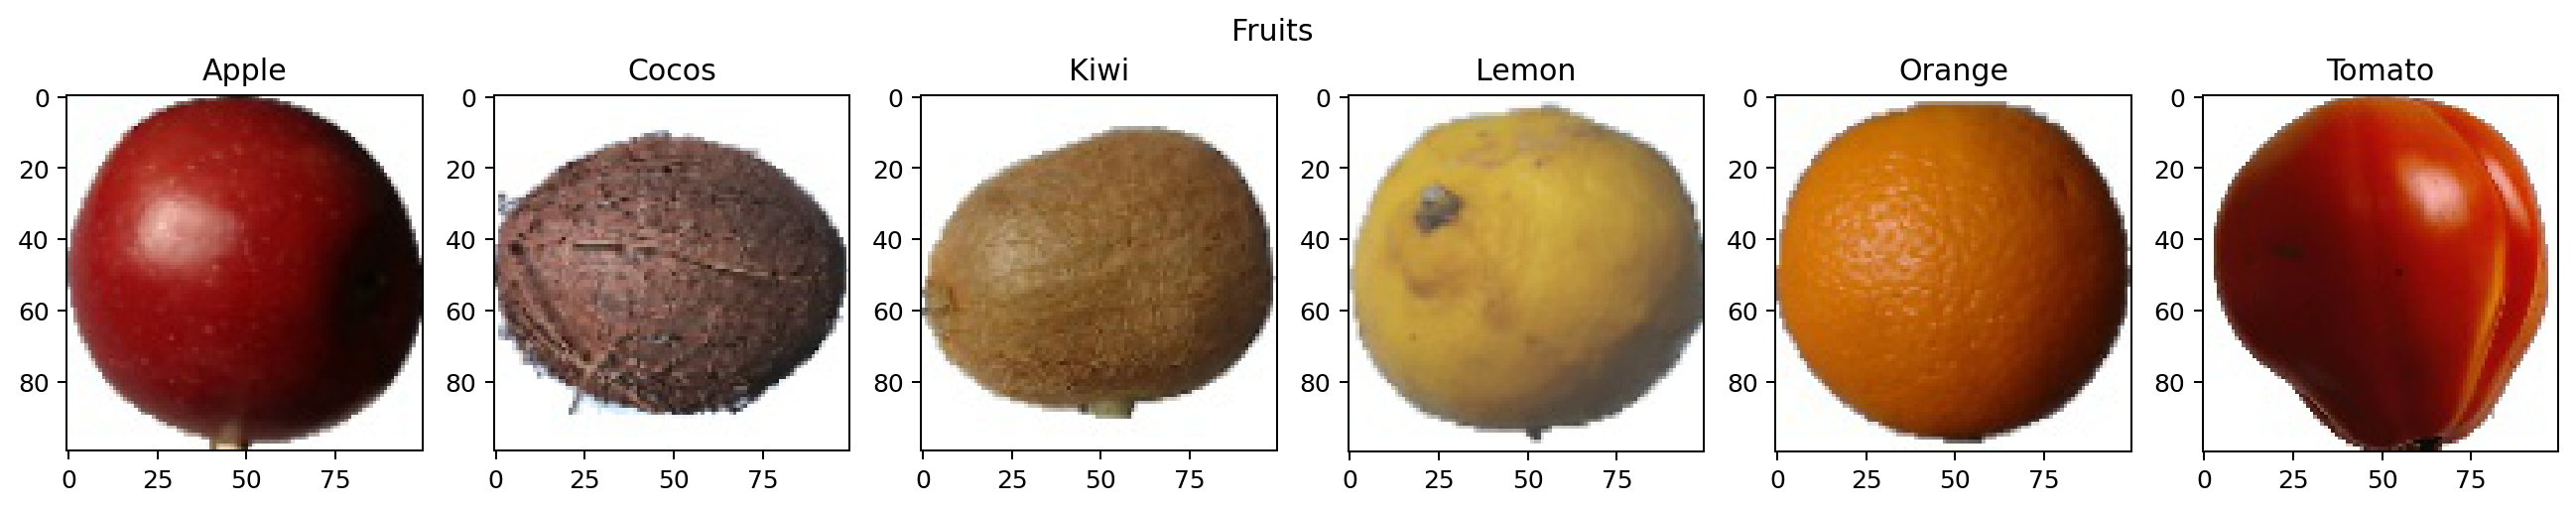

In [9]:
train_dataset_images = load_image_files(train_dataset)
test_dataset_images = load_image_files(test_dataset)

# Debug Training Dataset Information
categories = list(train_dataset_images.keys())

fig, axs = plt.subplots(1, len(categories), figsize=(18, 3), dpi=180)
fig.suptitle('Fruits')

for idx in range(len(categories)):
    category = categories[idx]
    print(train_dataset_images[category][0].shape)
    axs[idx].imshow(train_dataset_images[category][0])
    axs[idx].set_title(category)

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler    

In [11]:
def decomposition(dataset):
    X_dataset = []
    y_dataset = []
    
    for category, images in dataset.items():
        X_dataset.extend(images)
        y_dataset.extend([category for _ in range(len(images))])
    
    scaler = StandardScaler()
    X_dataset = scaler.fit_transform([i.flatten() for i in X_dataset])
    
    return X_dataset, y_dataset

In [12]:
X_train, y_train = decomposition(train_dataset_images)
X_test, y_test = decomposition(test_dataset_images)

# Debugging info
print("Train data")
print("X length: ", len(X_train))
print("y length: ", len(y_train))

print()

print("Test data")
print("X length: ", len(X_test))
print("y length: ", len(y_test))

Train data
X length:  2796
y length:  2796

Test data
X length:  4653
y length:  4653


## Principal Component Analysis

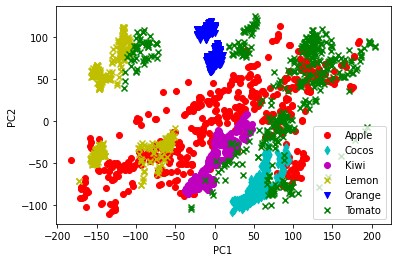

In [13]:
pca = PCA(n_components=2)
dataIn2D = pca.fit_transform(X_train)

colors = {'Apple': 'r', 'Tomato': 'g', 'Orange': 'b', 'Cocos': 'c', 'Kiwi': 'm', 'Lemon': 'y'}
markers = {'Apple': 'o', 'Tomato': 'x', 'Orange': 'v', 'Cocos': 'd', 'Kiwi': 'o', 'Lemon': 'x'}

categories = list(train_dataset_images.keys())

for i in range(len(categories)):
    start = i*len(train_dataset_images[categories[i]])
    end = start+len(train_dataset_images[categories[i]])
    plt.scatter(dataIn2D[start:end,0], dataIn2D[start:end,1], color=colors[categories[i]], marker=markers[categories[i]], label=categories[i])

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

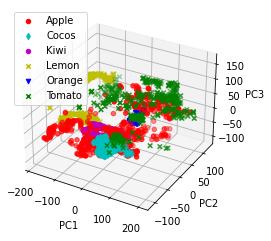

In [14]:
pca = PCA(n_components=3)
dataIn3D = pca.fit_transform(X_train)

colors = {'Apple': 'r', 'Tomato': 'g', 'Orange': 'b', 'Cocos': 'c', 'Kiwi': 'm', 'Lemon': 'y'}
markers = {'Apple': 'o', 'Tomato': 'x', 'Orange': 'v', 'Cocos': 'd', 'Kiwi': 'o', 'Lemon': 'x'}

categories = list(train_dataset_images.keys())
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(categories)):
    start = i*len(train_dataset_images[categories[i]])
    end = start+len(train_dataset_images[categories[i]])
    ax.scatter(dataIn3D[start:end,0], dataIn3D[start:end,1], dataIn3D[start:end,2], color=colors[categories[i]], marker=markers[categories[i]], label=categories[i])

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.legend()

## Training - SVC

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, f1_score,roc_curve,accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn import preprocessing

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


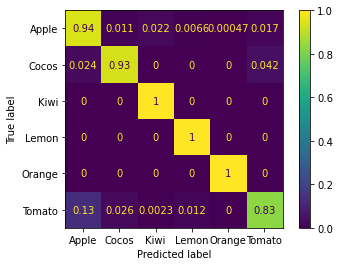

Accuracy with SVM: 90.91%


In [32]:
clf = SVC(gamma='auto', kernel='linear', probability=True)
clf.fit(X_train, y_train) 


plot_confusion_matrix(clf, X_test, y_test, normalize='true')  
plt.show()

y_pred = clf.predict(X_test)

#Evaluation
precision = accuracy_score(y_pred, y_test) * 100
print("Accuracy with SVM: {0:.2f}%".format(precision))

# calculate the FPR and TPR for all thresholds of the classification
probs = clf.predict_proba(X_test)
probs = probs[:, 1]

In [35]:
y_score = clf.fit(X_train, y_train).decision_function(X_test)
print("Y score " ,y_score)
#labels = preprocessing.label_binarize(y_test, classes=[i for i in range(len(y_test))])
#print(labels)
#svm_fpr, svm_tpr, thresholds = roc_curve([i for i in range(len(y_test))], probs)
#svm_auc = roc_auc_score(y_test, probs)

Y score  [[ 5.2937338   1.74782234  3.26417003 -0.29059696  4.24116184  0.73405469]
 [ 5.29553691  1.74495199  3.26281117 -0.29130918  4.2436336   0.73238632]
 [ 5.29538812  1.74599775  3.2607584  -0.29176267  4.2438987   0.73491128]
 ...
 [ 2.26704627 -0.31137038  1.15028174  4.24807501  3.24563401  5.26113496]
 [ 2.26857382 -0.31129502  1.16167912  4.25087047  3.24494183  5.25439509]
 [ 2.26060563 -0.31073813  1.17940706  4.25201015  3.23362262  5.26026075]]


### K-Fold

In [56]:
from sklearn.model_selection import KFold, validation_curve
from sklearn.model_selection import cross_validate
import numpy as np


In [57]:
def kfold_test(X_train, y_train, X_test, y_test, clf, k):
    kf = KFold(n_splits=k, shuffle=True)
    
    scores = cross_validate(clf, X_train, y_train, scoring='accuracy', cv=k, return_estimator=True)

    avg_acc_score = sum(scores['test_score'])/k

    print('Accuracy of each fold - {}'.format(scores['test_score']))
    print('Avg accuracy : {}'.format(avg_acc_score))
    
    best_estimator = scores['estimator'][np.argmax(scores['test_score'])]

    y_pred_test = best_estimator.predict(X_test)
    acc_test = sum(y_test == y_pred_test) / float(len(y_pred_test))
    f1_test = f1_score(y_test, y_pred_test, average='weighted')

    print("Using the best estimator from CV:")
    print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1_test , acc_test))
    
    return y_pred_test

In [58]:
 kfold_test(X_train, y_train, X_test, y_test, clf, 5)

Accuracy of each fold - [0.91964286 0.99284436 0.94991055 0.91234347 0.83899821]
Avg accuracy : 0.9227478916432406
Using the best estimator from CV:
F1 score and accuracy score for test set: 0.8887 , 0.8863.


array(['Apple', 'Apple', 'Apple', ..., 'Tomato', 'Tomato', 'Tomato'],
      dtype='<U6')

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

def parameter_tuning(X_train, X_test, y_train, y_test, model, tuned_parameters, include_grid=False):
    
    scores = ['accuracy']
    
    best_parameters = []

    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()

        x = GridSearchCV(
            model, tuned_parameters, scoring=score
        )
        
        x.fit(X_train, y_train)

        print("Best parameters set found on development set:")
        best_parameters.append(x.best_params_)
        print(x.best_params_)
        print()
        if include_grid:
            print("Grid scores on development set:")
            print()
            means = x.cv_results_['mean_test_score']
            stds = x.cv_results_['std_test_score']
            for mean, std, params in zip(means, stds, x.cv_results_['params']):
                print("%0.3f (+/-%0.03f) for %r"
                      % (mean, std * 2, params))
            print()

        print("Detailed classification report:")
        print()
        print("The model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.")
        print()
        y_true, y_pred = y_test, x.predict(X_test)
        print(classification_report(y_true, y_pred))
        print()
        
    return best_parameters

In [76]:
tuned_svm_parameters = [
    {
        'C': [0.001, 0.01, 0.1, 1, 3, 10], 
        'gamma': ["scale", "auto"],
        'kernel': ['rbf']
    }
]

In [77]:
best_svm_parameters = parameter_tuning(X_train, X_test, y_train, y_test, SVC(), tuned_svm_parameters)


# Tuning hyper-parameters for accuracy

Best parameters set found on development set:
{'C': 3, 'gamma': 'scale', 'kernel': 'rbf'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

       Apple       0.95      0.98      0.96      2134
       Cocos       0.83      0.95      0.89       166
        Kiwi       0.99      1.00      0.99       156
       Lemon       0.99      1.00      1.00       330
      Orange       0.99      1.00      1.00       160
      Tomato       0.99      0.93      0.96      1707

    accuracy                           0.96      4653
   macro avg       0.96      0.98      0.97      4653
weighted avg       0.96      0.96      0.96      4653




C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


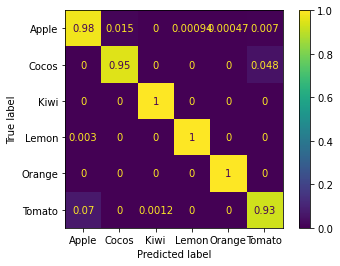

Accuracy with SVM: 96.13%


In [80]:
clf_tun = SVC(C=3,gamma='scale', kernel='rbf', probability=True)
clf_tun.fit(X_train, y_train) 


plot_confusion_matrix(clf_tun, X_test, y_test, normalize='true')  
plt.show()

y_pred = clf_tun.predict(X_test)

#Evaluation
precision = accuracy_score(y_pred, y_test) * 100
print("Accuracy with SVM: {0:.2f}%".format(precision))

# calculate the FPR and TPR for all thresholds of the classification
probs = clf_tun.predict_proba(X_test)
probs = probs[:, 1]

In [81]:
 kfold_test(X_train, y_train, X_test, y_test, clf_tun, 5)

Accuracy of each fold - [0.94821429 0.99821109 0.9588551  0.91413238 0.83542039]
Avg accuracy : 0.9309666496294403
Using the best estimator from CV:
F1 score and accuracy score for test set: 0.9627 , 0.9626.


array(['Apple', 'Apple', 'Apple', ..., 'Tomato', 'Tomato', 'Tomato'],
      dtype='<U6')

## Training - Deep Learning

In [16]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

AssertionError: Duplicate registrations for type 'optimizer'

In [ ]:
model = models.Sequential() #step 1
model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(100,100,3),padding='same')) #step2
model.add(Activation('relu'))  # step3
model.add(MaxPooling2D(pool_size=2)) #step4
model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same')) #repeating step 2 and step3 but with more filters of 32
model.add(MaxPooling2D(pool_size=2)) #repeating step 4 again
model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same')) #repeating step 2 and step3 but with more filters of 64
model.add(MaxPooling2D(pool_size=2)) #repeating step 4 again
model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same')) #repeating step 2 and step3 but with more filters of 64
model.add(MaxPooling2D(pool_size=2)) #repeating step 4 again
model.add(Dropout(0.3)) # step5
model.add(Flatten()) #step 6
model.add(Dense(150)) #step 7
model.add(Activation('relu')) # setp 3
model.add(Dropout(0.4)) # step 5
model.add(Dense(81,activation = 'softmax')) # setp3 and step7. but this time, we are using activation function as softmax (if we train on two classes then we set sigmoid)

In [ ]:
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
labels_test = preprocessing.label_binarize(y_test, classes=[i for i in range(len(y_test))])
labels_train = preprocessing.label_binarize(y_train, classes=[i for i in range(len(y_train))])

history = model.fit(X_train,labels_train,
        batch_size = 32,
        epochs=30,
        validation_data=(X_test, labels_test),
        verbose=2, shuffle=True)